In [1]:
%matplotlib inline
import skimage.io
import skimage.morphology
import matplotlib.pyplot as plt

import os.path
import os

import sys
sys.path.insert(0, 'seg_nuclei/')

import helper.metrics
import helper.model_builder

import numpy as np

import tensorflow as tf
import keras

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

Using TensorFlow backend.


In [2]:
debug = True

In [3]:
cell_min_size = 10**2
boundary_boost_factor = 1

In [4]:
dir_images = "data/BBBC022/test/x_big/"

tag = "DL_on_Hand_boundary_4"

out_dir_probmap = "/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/" + tag + "/probmap/"
out_dir_label = "/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/" + tag + "/segm/"

weights_path = '/home/jr0th/github/segmentation/checkpoints/' + tag + '/checkpoint_0199.hdf5'

# GET PREDICTIONS

In [5]:
# build session running on GPU 1
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "0"
session = tf.Session(config = configuration)

# apply session
keras.backend.set_session(session)

In [6]:
batch_size = 10

bit_depth = 8

imagebuffer = skimage.io.imread_collection(dir_images + '*.png')
images = imagebuffer.concatenate()

dim1 = images.shape[1]
dim2 = images.shape[2]

images = images.reshape((-1, dim1, dim2, 1))

# preprocess
images = images / 255

# build model and laod weights
model = helper.model_builder.get_model_1_class(dim1, dim2)
model.load_weights(weights_path)

predictions = model.predict(images, batch_size = 1)

print(predictions.shape)

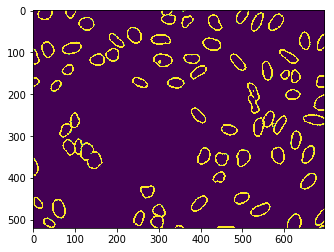

In [7]:
# print one prediction for debug purposes
if(debug):
    plt.imshow(predictions[42].squeeze())
    plt.show()

IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.png


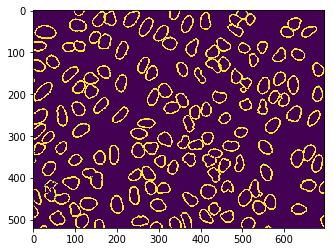

/usr/local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


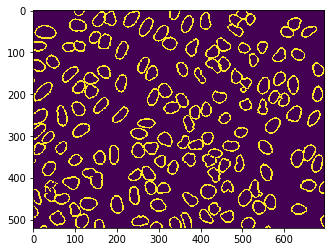

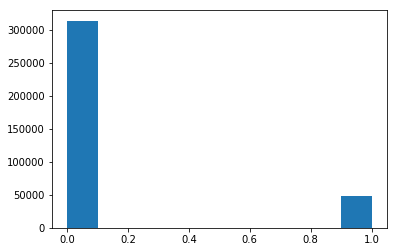

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


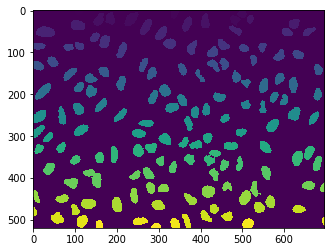

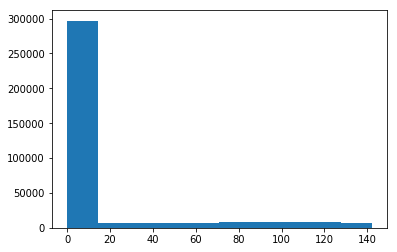

IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/segm/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.png is a low contrast image
  warn('%s is a low contrast image' % fname)


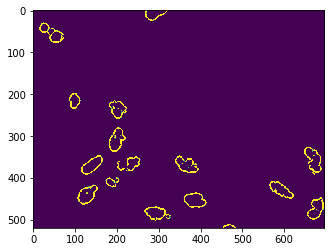

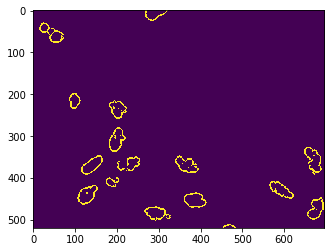

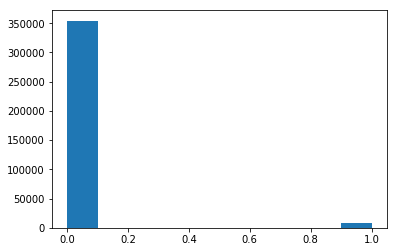

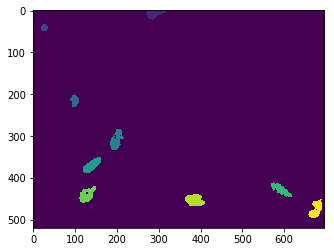

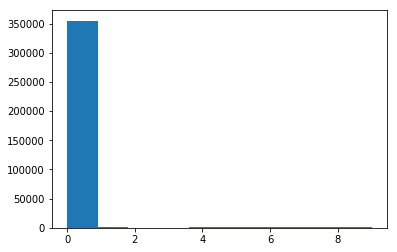

IXMtest_P21_s4_w19B7DC88B-10BB-4B51-9A10-9E30285688C1.png


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/segm/IXMtest_P19_s6_w10EBAD15B-2822-48B9-B9C8-4DF5D80AB940.png is a low contrast image
  warn('%s is a low contrast image' % fname)


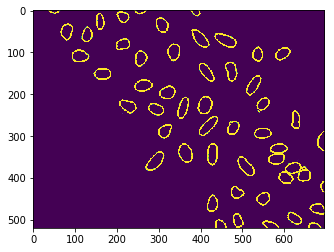

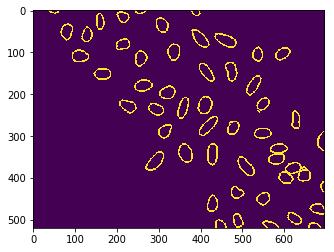

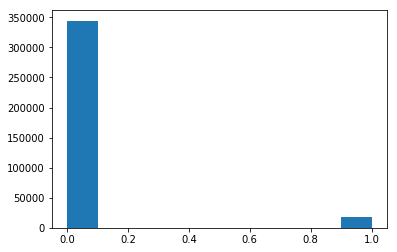

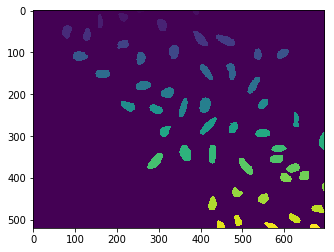

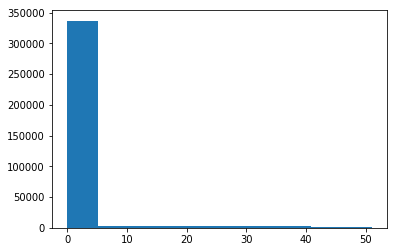

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/segm/IXMtest_P21_s4_w19B7DC88B-10BB-4B51-9A10-9E30285688C1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [8]:
for i in range(len(images)):

    filename = imagebuffer.files[i]
    filename = os.path.basename(filename)
    print(filename)
    
    probmap = predictions[i].squeeze()
    
    plt.imshow(probmap)
    plt.show()
    
    skimage.io.imsave(out_dir_probmap + filename, probmap)
    
    contour = helper.metrics.probmap_to_contour(probmap)
    
    plt.imshow(contour)
    plt.show()
    
    plt.hist(contour.flatten())
    plt.show()
    
    label = helper.metrics.contour_to_label(contour, images[i])
    
    plt.imshow(label)
    plt.show()
    
    plt.hist(label.flatten())
    plt.show()

    skimage.io.imsave(out_dir_label + filename, label)